In [37]:
#Importing important Libraries 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split

In [38]:
# Import datasets.

train = pd.read_csv("C:/Users/User/User/Desktop/TITANIC Kaggle/DATA/train.csv")
test  = pd.read_csv("C:/Users/User/User/Desktop/TITANIC Kaggle/DATA/test.csv")

In [39]:
# To get a feel how the training set looks like.

train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [40]:
# To get a feel how the test set looks like.

test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [41]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Fortune, Mr. Mark",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [42]:
# To get where the null values are present.
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
listMF = []
for i in train['PassengerId']:
    if train.Sex[i-1] =="male":
        listMF.append(1)
    else:
        listMF.append(0)
listMF = pd.Series(listMF)
train["Sex_Code"] = listMF.values

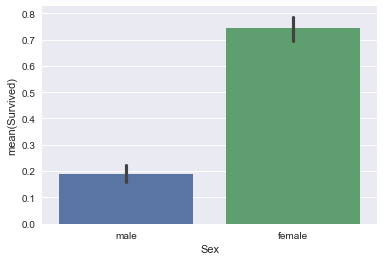

In [44]:
# Exploratory Analysis. 1

import seaborn as sns
sns.barplot(x="Sex",y="Survived",data = train)

In [45]:
print('% of female survived  '+str(train[train.Sex == 'female'].Survived.mean()*100))
print('%of male survived  '+str(train[train.Sex == 'male'].Survived.mean()*100))
print("This shows that if you were a female you had better chances of survival.")

% of female survived  74.20382165605095
%of male survived  18.890814558058924
This shows that if you were a female you had better chances of survival.


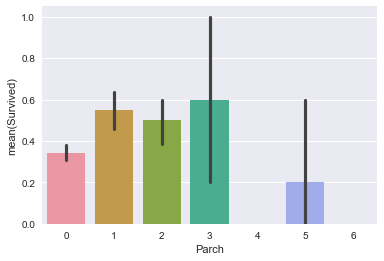

In [46]:
#2. No. of Parents/Children(PARCH) Survived
sns.barplot( x='Parch', y='Survived', data = train)

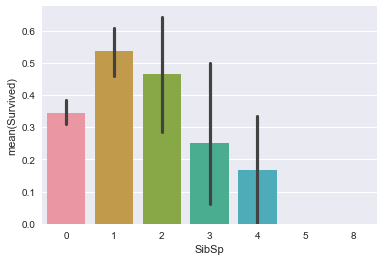

In [47]:
#3 No. of Siblings/Spouce(SibSp) that survived.
sns.barplot( x='SibSp', y='Survived', data = train)

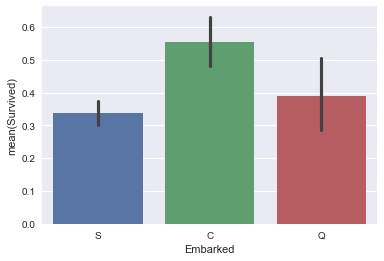

In [48]:
#4 Seeing that number of people that embaked from different places that survived.
sns.barplot( x='Embarked', y='Survived', data = train)

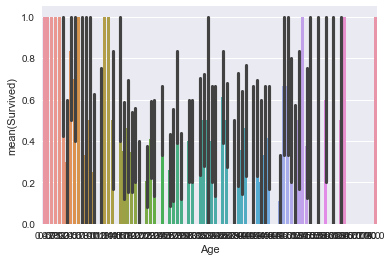

In [49]:
#5
sns.barplot( x='Age', y='Survived', data = train)

In [58]:
listAG = []
listAge = []
for i in train['PassengerId']:
    if train.Age[i-1] <= 1:
        listAG.append("1")
    elif train.Age[i-1] >1 and train.Age[i-1] <= 12:
        listAG.append("12")
    elif train.Age[i-1] >12 and train.Age[i-1] <= 20:
        listAG.append("20")
    elif train.Age[i-1] >20 and train.Age[i-1] <= 50:
        listAG.append("50")
    elif train.Age[i-1] >50:
        listAG.append("75")
    else:
        listAG.append("-1")
listAG = pd.Series(listAG)
train["Age_grp"] = listAG.values   

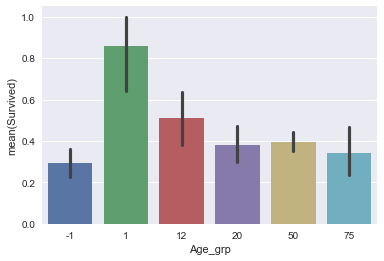

In [59]:
# since the previous plot didn't give any meaningful insight I grouped the ages to these groups.
# NOTE: These contain some unknown values
sns.barplot(x="Age_grp", y="Survived", data= train)

In [60]:
# replacing the unknown embarked with S as most people.
listE = []
for i in train['PassengerId']:
    if train.Embarked[i-1] == 'S':
        listE.append(1)
    elif train.Embarked[i-1] == 'Q':
        listE.append(2)
    elif train.Embarked[i-1] == 'C':
        listE.append(3)
    else:
        listE.append(1)
listE = pd.Series(listE)
train["EmbarkedE"] = listE.values

In [61]:
train.head(2)
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_Code         0
Age_grp          0
EmbarkedE        0
dtype: int64

In [62]:
pd.isnull(test).sum()
# No problem as I won't use age, Fare, Cabin. 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
EmbarkedE        0
Age_grp          0
dtype: int64

In [63]:
listAge = []
for i in test['PassengerId']:
    if test.Age[i-892] <= 1:
        listAge.append(1)
    elif test.Age[i-892] >1 and train.Age[i-892] <= 12:
        listAge.append(12)
    elif test.Age[i-892] >12 and train.Age[i-892] <= 20:
        listAge.append(20)
    elif test.Age[i-892] >20 and train.Age[i-892] <= 50:
        listAge.append(50)
    elif test.Age[i-892] >50:
        listAge.append(75)
    else:
        listAge.append(-1)
listAge = pd.Series(listAge)
test["Age_grp"] = listAge.values   

In [64]:
listE = []
for i in test['PassengerId']:
    if train.Embarked[i-892] == 'S':
        listE.append(1)
    elif train.Embarked[i-892] == 'Q':
        listE.append(2)
    elif train.Embarked[i-892] == 'C':
        listE.append(3)
    else:
        listE.append(1)
listE = pd.Series(listE)
test["EmbarkedE"] = listE.values
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,EmbarkedE,Age_grp
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,50
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3,50
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,50
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,50
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,50


In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Code,Age_grp,EmbarkedE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,50,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,50,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,50,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,50,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,50,1


In [66]:
listMF = []
for i in test['PassengerId']:
    if test.Sex[i-892] =="male":
        listMF.append(1)
    else:
        listMF.append(0)
listMF = pd.Series(listMF)
test["Sex_Code"] = listMF.values

In [67]:
train = train.drop(['Pclass','Name','Sex','Ticket','Fare','Cabin','Embarked'],axis = 1)

In [68]:
test = test.drop(['Pclass','Name','Sex','Ticket','Fare','Cabin','Embarked'],axis = 1)

In [69]:
test.head()

,PassengerId,Age,SibSp,Parch,EmbarkedE,Age_grp,Sex_Code
0,892,34.5,0,0,1,50,1
1,893,47.0,1,0,3,50,0
2,894,62.0,0,0,1,50,1
3,895,27.0,0,0,1,50,1
4,896,22.0,1,1,1,50,0


In [127]:
train.head()

,PassengerId,Survived,SibSp,Parch,Sex_Code,Age_grp,EmbarkedE
0,1,0,1,0,1,50,1
1,2,1,1,0,0,50,3
2,3,1,0,0,0,50,1
3,4,1,1,0,0,50,1
4,5,0,0,0,1,50,1


In [128]:
train = train.drop(['Age'],axis =1)
test = test.drop(['Age'],axis =1)

ValueError: labels ['Age'] not contained in axis

In [129]:
target = train['Survived']
para = train.drop(['Survived'], axis=1)

In [130]:
para = para.drop(['PassengerId'],axis =1)
para.head()

,SibSp,Parch,Sex_Code,Age_grp,EmbarkedE
0,1,0,1,50,1
1,1,0,0,50,3
2,0,0,0,50,1
3,1,0,0,50,1
4,0,0,1,50,1


In [131]:
# Splitting into train and dev sets.
x_train, x_dev, y_train, y_dev = train_test_split(para, target, test_size = 0.25, random_state = 0)

In [132]:
#logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred1 = logreg.predict(x_dev)
accuracy1 = (((y_pred1-y_dev)**2))**0.5
print(1 - accuracy1.mean())

0.7847533632286996


In [133]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred2 = svc.predict(x_dev)
accuracy2 = (((y_pred2-y_dev)**2))**0.5
print(1 - accuracy2.mean())

0.8161434977578476


In [134]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred3 = randomforest.predict(x_dev)
accuracy3 = (((y_pred3-y_dev)**2))**0.5
print(1 - accuracy3.mean())

0.7847533632286996


In [135]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred4 = knn.predict(x_dev)
accuracy4 = (((y_pred4-y_dev)**2))**0.5
print(1 - accuracy4.mean())

0.8071748878923767


In [136]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred5 = gbk.predict(x_dev)
accuracy5 = (((y_pred5-y_dev)**2))**0.5
print(1 - accuracy5.mean())

0.8251121076233183


In [137]:
# Using Gradient Boost and SVM for Test sets.

In [139]:
Id = test['PassengerId']
test = test.drop(['PassengerId'],axis = 1)

In [140]:
predictSVM = svc.predict(test)
predictGB =  gbk.predict(test)

In [145]:
Out1 = pd.DataFrame({'PassengerId': Id , 'Survived' :predictSVM})
Out2 = pd.DataFrame({'PassengerId': Id , 'Survived' :predictGB})

In [152]:
Out1.to_csv("C:/Users/User/User/Desktop/TITANIC Kaggle/DATA/Submission.csv",index = False)
Out2.to_csv("C:/Users/User/User/Desktop/TITANIC Kaggle/DATA/Submission2.csv", index = False)
